### Exercise 1 Part Copied

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time
import matplotlib

In [105]:
np.random.seed(999)

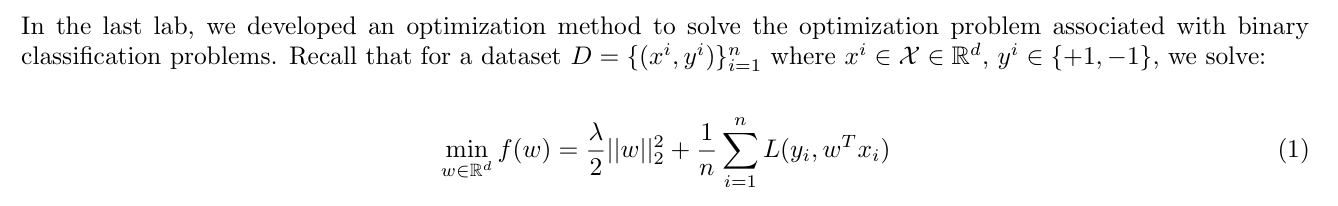

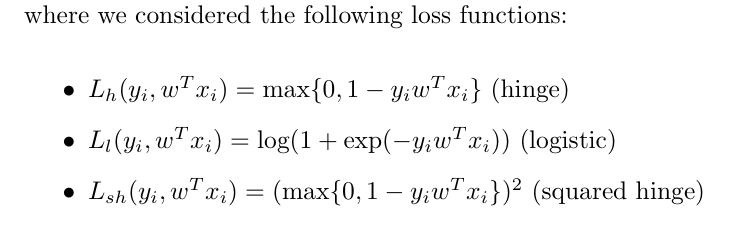

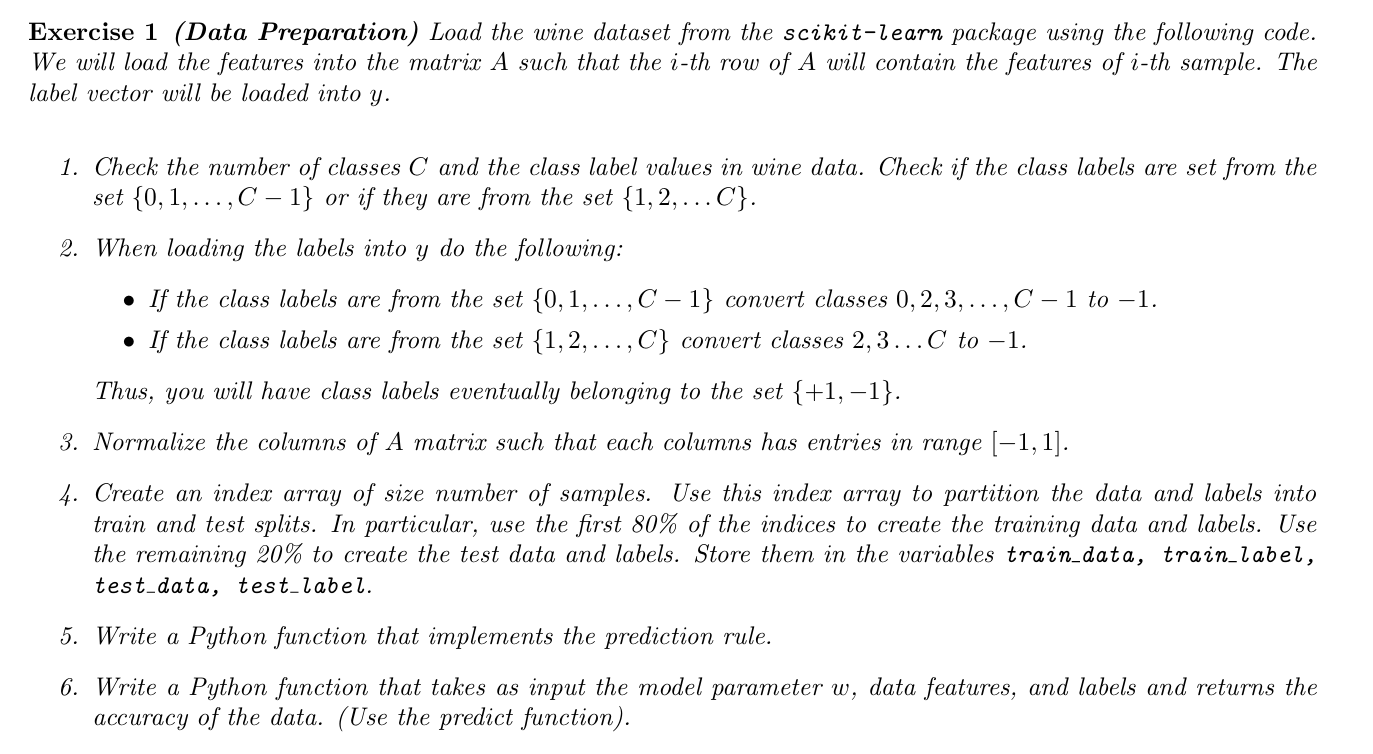

In [106]:
from sklearn.datasets import load_wine

In [107]:
wine = load_wine()

In [108]:
print(wine.data.shape)

(178, 13)


In [109]:
A = wine.data

In [110]:
print(wine.target.shape)

(178,)


In [111]:
n = wine.data.shape[0]
d = wine.data.shape[1]

Question 1. Find number of classes

In [112]:
np.unique(wine.target)

array([0, 1, 2])

It is of form [0,1,...C-1]. Number of classes are 3

Question 2: When loading the labels into y do the following:
 • If the class labels are from the set {0,1,...,C − 1} convert classes 0,2,3,...,C − 1 to −1.
 • If the class labels are from the set {1,2,...,C} convert classes 2,3...C to −1.




In [113]:
y = 1.0*np.ones([A.shape[0], ])
for i in range(wine.target.shape[0]):
  if wine.target[i] != 1:
    y[i]= -1

Question 3: Normalize the columns of A matrix such that each columns has entries in range [−1,1].

In [114]:
for j in range(A.shape[1]):
  # Find the maximum absolute value in each column
  max_abs_values = np.max(np.abs(A[:,j]))
  # Divide each element of the column by the maximum absolute value
  A[:,j] = A[:,j]/max_abs_values

In [115]:
A

array([[0.95954147, 0.29482759, 0.75232198, ..., 0.60818713, 0.98      ,
        0.63392857],
       [0.89008766, 0.30689655, 0.6625387 , ..., 0.61403509, 0.85      ,
        0.625     ],
       [0.88739042, 0.40689655, 0.82662539, ..., 0.60233918, 0.7925    ,
        0.70535714],
       ...,
       [0.89480782, 0.73793103, 0.6996904 , ..., 0.34502924, 0.39      ,
        0.49702381],
       [0.88806473, 0.44655172, 0.73374613, ..., 0.35087719, 0.405     ,
        0.5       ],
       [0.95279838, 0.70689655, 0.84829721, ..., 0.35672515, 0.4       ,
        0.33333333]])

Question 4: Create an index array of size number of samples. Use this index array to partition the data and labels into
 train and test splits. In particular, use the first 80% of the indices to create the training data and labels. Use
 the remaining 20% to create the test data and labels. Store them in the variables train
 data, train
 test
 data, test
 label.

In [116]:
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices
# print(indexarr) #check indexarr after shuffling

#Use the first 80% of indexarr to create the train data and the remaining
p = int(0.8*len(indexarr))
train_data =  A[indexarr[:p]]
train_label = y[indexarr[:p]]
test_data = A[indexarr[p:]]
test_label = y[indexarr[p:]]

print("len of train data: ", len(train_data))
print("len of train target: ", len(train_label))
print("len of test data: ", len(test_data))
print("len of test target: ", len(test_label))

len of train data:  142
len of train target:  142
len of test data:  36
len of test target:  36


Question 5: Write a Python function that implements the prediction rule.
 label,


In [117]:
def predict(w,x):
  # for w^Tx = 0, since -1 is more I will bias it towards it -1
  if w@x <= 0:
    return -1
  if w@x >0:
    return 1

 Question 6. Write a Python function that takes as input the model parameter w, data features, and labels and returns the
 accuracy of the data. (Use the predict function).

In [118]:
def compute_accuracy(data, labels, model_w):
  #Use predict function defined above
  accuracy = 0.
  assert len(data) == len(labels)
  n = data.shape[0]
  for i in range(n):
    x = data[i]
    prediction = predict(model_w, x)
    if labels[i] == prediction:
      accuracy+=1
  return accuracy/n

### Exercise 2

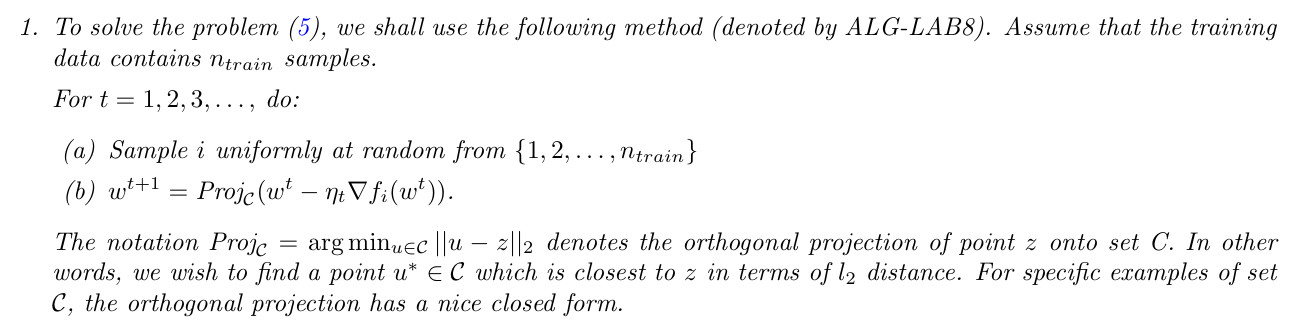

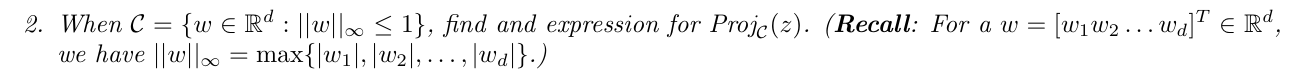

The projection of a vector $z$ onto the set $C$ can be found by clipping the components of $z$ that are outside the range $[-1,1]$. This is because $C$ is defined as the set of vectors in $\mathbb{R}^d$ where each component is bounded between -1 and 1. This is because since max of absolute of components is less than 1 means all the absolute values of component will  be less that 1.which implies each of the component must be between $[-1,1]$.

Let $\operatorname{Proj}_C(z)$ denote the projection of $z$ onto $C$. Then, the expression for $\operatorname{Proj}_C(z)$ can be obtained by performing the following element-wise operation:
$$
\left(\operatorname{Proj}_C(z)\right)_i= \begin{cases}-1 & \text { if } z_i<-1 \\ z_i & \text { if }-1 \leq z_i \leq 1 \\ 1 & \text { if } z_i>1\end{cases}
$$
where $i=1,2, \ldots, d$.

In other words, for each component of $z$, if it is less than -1 , it is set to -1 ; if it lies within the range $[-1,1]$, it remains unchanged; and if it is greater than 1 , it is set to 1 .

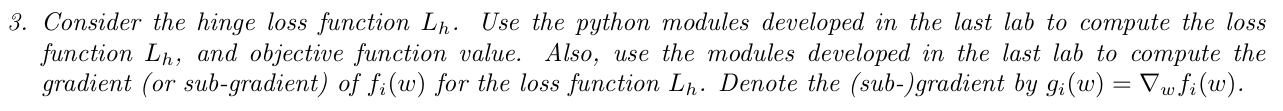

Our objective function is:

$$f(w)=\frac{\lambda}{2}\|w\|_2^2+\frac{1}{n} \sum_{i=1}^n L\left(y_i, w^T x_i\right)$$

We can define objective as sum of a loss function for each data point.

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L\left(y_i, w^T x_i\right)$$

which will imply

$$\min_w f(w)= \min_w \sum_{i=1}^{n}f_i(w)$$

$L_h(y_i, w^Tx_i) = \max \left\{ {0, 1-y_iw^Tx_i} \right\}$

We know that $f_i(w)$ is where $L$ is $L_h$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_h\left(y_i, w^T x_i\right)$$


The subdifferential of the hinge loss with respect to $w$ can be calculated as follows:

When $1-y w^T x<0$, the hinge loss is 0 , so its gradient is 0 .

When $1-y w^T x>0$, the hinge loss is $1-y w^T x$, so the gradient with respect to $w$ is simply $-y x$, because $\frac{∂ \left(1-y w^T x\right)}{∂ w}=-y x$.

Therefore, the subgradient of the hinge loss with respect to $w$ is:
$$
\nabla_w L_h\left(y, w^T x\right)= \begin{cases}-y x & \text { if } 1-y w^T x>0 \\ 0 & \text { if }1-y w^T x<0 \end{cases}
$$

When $1-y w^T x=0$, the hinge loss function is exactly at the hinge point where it changes from being zero to positive. At this point, the function is not differentiable, but we can still consider its subdifferential.

The subdifferential of the hinge loss function at this point includes all possible gradients between the points where the loss is zero and positive. In other words, any value between $-y x$ when $1-$ $y w^T x>0$ and 0 when $1-y w^T x \leq 0$ is included in the subdifferential.

Therefore, at $1-y w^T x=0$, the derivative is not well-defined, but any value between $-y x$ and 0 can be considered as a subgradient. Typically, a common choice is to include $-y x$ as the subgradient at this point.

Therefore for the regularized version, we have:

$$
\nabla_w f_i\left(y, w^T x\right)= \begin{cases}\frac{\lambda w}{n}-\frac{y x}{n} & \text { if } 1-y w^T x \geq 0 \\ \frac{\lambda w}{n} & \text { if }1-y w^T x<0 \end{cases}
$$

This is often used in optimization algorithms such as subgradient descent when dealing with hinge loss.

In [119]:
def hinge_loss(z):
    return np.maximum(0, 1 - z)

def compute_loss(x, y, w, lamda, n):
  z = y*w@x
  loss = hinge_loss(z)/n
  loss += (lamda*norm(w)**2)/(2*n)
  return loss

def compute_cost(A,y,w,lamda):
  cost = 0
  n = A.shape[0]
  for i in range(n):
    cost += compute_loss(A[i], y[i], w, lamda, n)
  return cost

def subgradient_hingeloss(x, y, w, lamda, n):
  if 1-y*w@x >= 0:
    grad = (lamda*w) - (y*x)
  else: grad = lamda*w
  return grad/n

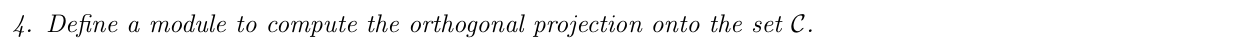

In [120]:
def projection_inf(w):
  return np.clip(w, -1, 1)

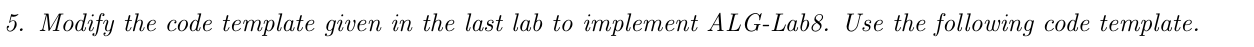

In [121]:
def OPT1(data,labels,lamda,num_epochs):
  t = 1
  n = data.shape[0]
  d = data.shape[1]

  ## initialization of lists for further questions (DB Store)
  objective_values = [ ]
  test_set_accuracy = []
  train_set_accuracy = []

  #initialize w
  w = np.zeros((d,1))
  w = w.flatten()
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      w = w-(subgradient_hingeloss(data[i], labels[i], w, lamda, n)/t)
      w= projection_inf(w)
      t = t+1
      if t>1e4:
        t = 1
    objective_value = compute_cost(data, labels, w, lamda)
    test_accuracy = compute_accuracy(test_data, test_label, w)
    train_accuracy = compute_accuracy(data, labels, w)
    # print("Lamda is: ", lamda)
    # print("Epoch no. : ", epoch)
    # print("Objective values: ", objective_value)
    # print("test accuracy: ", test_accuracy)
    # print("train accuracy: ", train_accuracy)
    # print('--------------------------------------')
    objective_values.append(objective_value)
    test_set_accuracy.append(test_accuracy)
    train_set_accuracy.append(train_accuracy)
  return w, objective_values, test_set_accuracy, train_set_accuracy

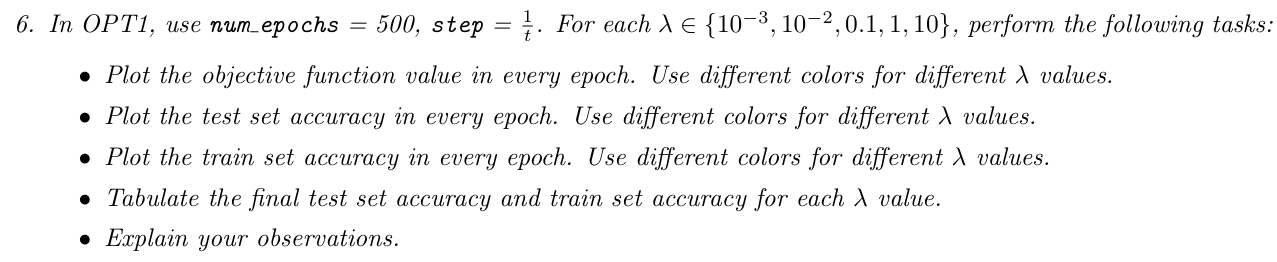

In [122]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]    #[1e-3, 1e-2, 0.1, 1, 10]
objective_values_lamda_store = []
test_set_accuracy_store = []
train_set_accuracy_store = []
final_test_set_accuracy_store = []
epochs = [i for i in range(500)]
for lamda in lamdas:
  w, objective_values, test_set_accuracy, train_set_accuracy = OPT1(train_data, train_label, lamda, 500)
  # plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')
  objective_values_lamda_store.append(objective_values)
  test_set_accuracy_store.append(test_set_accuracy)
  train_set_accuracy_store.append(train_set_accuracy)
# plt.legend()
# plt.show()

 Plot the objective function value in every epoch. Use different colors for different λ values

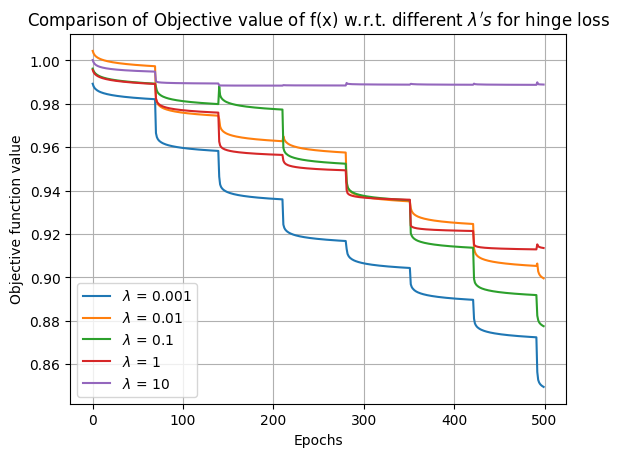

In [123]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(500)]
i=0
for lamda in lamdas:
  plt.plot(epochs, objective_values_lamda_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for hinge loss")
plt.legend()
plt.grid(True)
plt.show()

We observe that for $\lambda = 10$ the objective value is higher. This might happen (which is different from previous lab) because the projection is taking the w's to maximum 1, and hence the objective may become high for $\lambda$ being high alone. I am saying this because anyway the accuracies are same for all $\lambda 's$

Plot the test set accuracy in every epoch. Use different colors for different λ values.

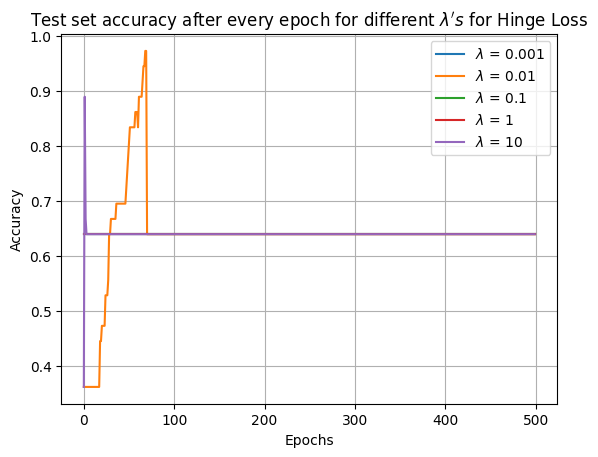

In [124]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(500)]
i=0
for lamda in lamdas:
  plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for different $\lambda's$ for Hinge Loss")
plt.legend()
plt.grid(True)
plt.show()

Plot the train set accuracy in every epoch. Use different colors for different λ values

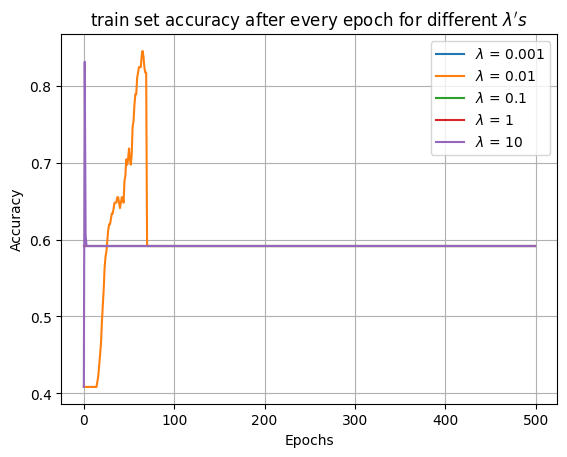

In [128]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(500)]
i=0
for lamda in lamdas:
  plt.plot(epochs, train_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for different $\lambda's$")
plt.legend()
plt.grid(True)
plt.show()

In [129]:
list_of_final_train_set_accuracy = [x[-1] for x in train_set_accuracy_store]
list_of_final_test_set_accuracy = [x[-1] for x in test_set_accuracy_store]

In [130]:
from tabulate import tabulate
head = [f"lambda", "Train set accuracy","Test set accuracy"]
table=[[lamdas[i], list_of_final_train_set_accuracy[i], list_of_final_test_set_accuracy[i]] for i in range(len(lamdas)) ]
print(tabulate(table, headers=head, tablefmt="grid"))

+----------+----------------------+---------------------+
|   lambda |   Train set accuracy |   Test set accuracy |
+==========+======================+=====================+
|    0.001 |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.01  |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.1   |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    1     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|   10     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+


Explain your observations.

Observations:
When using hinge loss, we notice that when $\lambda$ is set to 10, we achieve the high objective value. However, simply selecting $\lambda$ as 10 does not imply inferiority. This is because accuracy remains constant regardless of the chosen $\lambda$. Any variations in the objective function may stem from the influence of the regularization term. The optimal objective function is achieved when $\lambda$ is  0.1, underscoring the importance of selecting the appropriate $\lambda$ for improved performance.

Additionally, we observe that selecting initial weights is crucial. If we had chosen ones as the starting weights, then the best $\lambda$ would have been 10 as usual. our random initialization of weights closely approximates the actual value, which is why the objective does not improve for $\lambda = 10$.

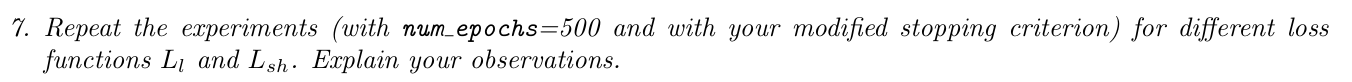

In [131]:
def logistic_loss(z):
    return np.log(1+np.exp(-z))

def compute_logistic_loss(x, y, w, lamda, n):
  z = y*w@x
  loss = logistic_loss(z)/n
  loss += (lamda*norm(w)**2)/(2*n)
  return loss

def compute_logistic_cost(A,y,w,lamda):
  cost = 0
  n = A.shape[0]
  for i in range(n):
    cost += compute_logistic_loss(A[i], y[i], w, lamda, n)
  return cost

In [132]:
def sqhinge_loss(z):
    return (np.maximum(0, 1-z))**2

def compute_sqhinge_loss(x, y, w, lamda, n):
  z = y*w@x
  loss = sqhinge_loss(z)/n
  loss += (lamda*norm(w)**2)/(2*n)
  return loss

def compute_sqhinge_cost(A,y,w,lamda):
  cost = 0
  n = A.shape[0]
  for i in range(n):
    cost += compute_sqhinge_loss(A[i], y[i], w, lamda, n)
  return cost

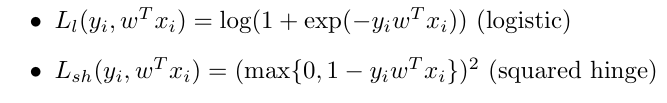

We know that $f_i(w)$ is where $L$ is $L_i$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)$$


We know that $f_i(w)$ is where $L$ is $L_{sh}$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)$$


Now I calculate gradient for each of these fucntions:

The logistic loss function $L_l$ is given by:
$$
L_l\left(y, w^T x\right)=\log \left(1+\exp \left(-y w^T x\right)\right)
$$

To compute the gradient (or subgradient) of $L_l$ with respect to the weight vector $w$, applying the chain rule, we have:
$$
\frac{\partial L_l}{\partial w}= \frac{1}{1+\exp \left(-y w^T x\right)}\frac{∂\exp(-yw^Tx)}{∂w} = \frac{-yx\exp(-yw^Tx)}{1+\exp \left(-y w^T x\right)}
$$

We can simplify this to:
$$
\nabla_w L_l\left(y, w^T x\right)=-y x \frac{1}{1+\exp \left(y w^T x\right)}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)) =  \frac{\lambda w}{n} + \frac{-yx}{n(1+exp(yw^Tx))}
$$


The squared hinge loss function $L_{s h}$ is given by:
$$
L_{s h}\left(y, w^T x\right)=\left(\max \left(0,1-y w^T x\right)\right)^2
$$

The gradient (or subgradient) of $L_{s h}$ with respect to the weight vector $w$ can be calculated as follows:

$$
\nabla_w L_{sh}\left(y, w^T x\right)=
\begin{cases}
-2(1-yw^Tx)(yx) & \text { if } 1-yw^Tx \geq 0 \\
0 & \text{ if } 1-yw^Tx < 0
\end{cases}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)) =  \begin{cases} \frac{\lambda w}{n} + \frac{-2(1-yw^Tx)(yx)}{n} & \text { if } 1-yw^Tx \geq 0 \\
 \frac{\lambda w}{n} & \text { if } 1-yw^Tx < 0
\end{cases}
$$


In [133]:
def gradient_sqhinge(x, y, w, lamda, n):
  if 1-y*w@x >= 0:
    grad = -2*(1-y*w@x)*y*x
    grad += lamda*w
    grad /= n
    return grad
  else: return lamda*w/n

def gradient_logistic(x, y, w, lamda, n):
  z = y*w@x
  grad = (-1*y*x)/(1 + np.exp(z))
  grad += lamda*w
  grad /= n
  return grad

In [139]:
def OPT1_with_stopping_criterion_with_logisticloss(data, labels, lamda, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])  # initialize weight vector
    arr = np.arange(data.shape[0])
    n = data.shape[0]
    d = data.shape[1]

    ## initialization of lists for further questions (DB Store)
    objective_values = [ ]
    test_set_accuracy = []
    train_set_accuracy = []
    best_test_accuracy = 0
    epochs_without_improvement = 0
    best_weights = None

    for epoch in range(num_epochs):
        np.random.shuffle(arr)  # shuffle data every epoch
        for i in np.nditer(arr):
            w = w-gradient_logistic(data[i], labels[i], w, lamda, n)/t
            w= projection_inf(w)
            t += 1
            if t > 1e4:
                t = 1
        objective_value = compute_logistic_cost(data, labels, w, lamda)
        test_accuracy = compute_accuracy(test_data, test_label, w)
        train_accuracy = compute_accuracy(data, labels, w)

        objective_values.append(objective_value)
        test_set_accuracy.append(test_accuracy)
        train_set_accuracy.append(train_accuracy)

        # Check for improvement in test accuracy
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_weights = w
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # print("Epoch no. : ", epoch)
        # print("Objective values: ", objective_value)
        # print("test accuracy: ", test_accuracy)
        # print("train accuracy: ", train_accuracy)
        # print('--------------------------------------')

        # Stopping criterion: If no improvement for 200 epochs, stop
        if epochs_without_improvement >= 200:
            break

    return best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy


In [140]:
def OPT1_with_stopping_criterion_with_sqhinge(data, labels, lamda, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])  # initialize weight vector
    arr = np.arange(data.shape[0])
    n = data.shape[0]
    d = data.shape[1]

    ## initialization of lists for further questions (DB Store)
    objective_values = [ ]
    test_set_accuracy = []
    train_set_accuracy = []
    best_test_accuracy = 0
    epochs_without_improvement = 0
    best_weights = None

    for epoch in range(num_epochs):
        np.random.shuffle(arr)  # shuffle data every epoch
        for i in np.nditer(arr):
            w = w-gradient_sqhinge(data[i], labels[i], w, lamda, n)/t
            w= projection_inf(w)
            t += 1
            if t > 1e4:
                t = 1
        objective_value = compute_sqhinge_cost(data, labels, w, lamda)
        test_accuracy = compute_accuracy(test_data, test_label, w)
        train_accuracy = compute_accuracy(data, labels, w)

        objective_values.append(objective_value)
        test_set_accuracy.append(test_accuracy)
        train_set_accuracy.append(train_accuracy)

        # Check for improvement in test accuracy
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_weights = w
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # print("Epoch no. : ", epoch)
        # print("Objective values: ", objective_value)
        # print("test accuracy: ", test_accuracy)
        # print("train accuracy: ", train_accuracy)
        # print('--------------------------------------')

        # Stopping criterion: If no improvement for 200 epochs, stop
        if epochs_without_improvement >= 200:
            break

    return best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy


In [141]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]    #[1e-3, 1e-2, 0.1, 1, 10]
objective_values_lamda_store = []
test_set_accuracy_store = []
train_set_accuracy_store = []
final_test_set_accuracy_store = []
epochs = [i for i in range(500)]
for lamda in lamdas:
  best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy = OPT1_with_stopping_criterion_with_logisticloss(train_data, train_label, lamda, 500)
  # plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')
  objective_values_lamda_store.append(objective_values)
  test_set_accuracy_store.append(test_set_accuracy)
  train_set_accuracy_store.append(train_set_accuracy)
# plt.legend()
# plt.show()

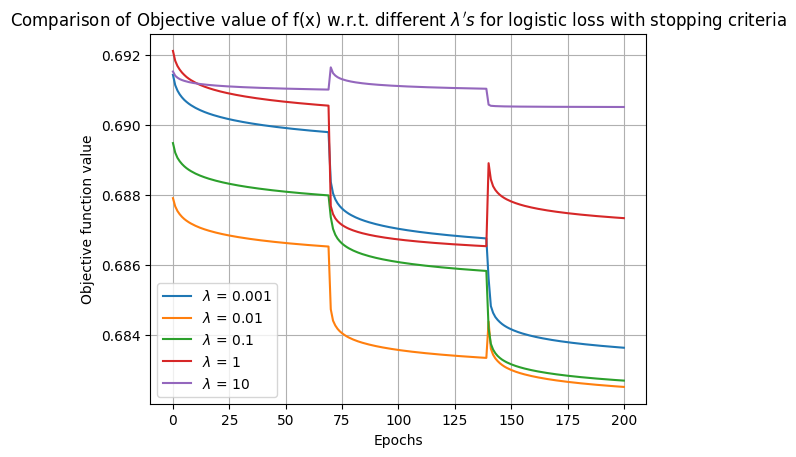

In [142]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(objective_values_lamda_store[i]))]
  plt.plot(epochs, objective_values_lamda_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for logistic loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

As we observe that for $\lambda = .01$ the algorithm moves towards better objective value. With stopping criteria in place the algorithm converges for some lambda values while some do not. Here it matters what the initial value of weights were taken

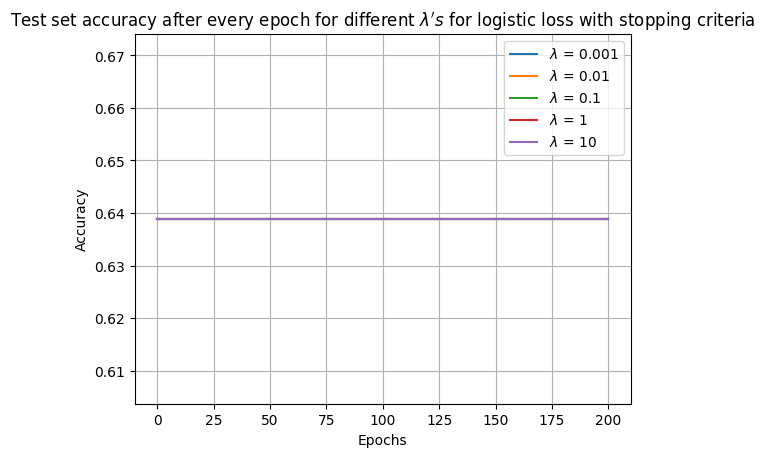

In [143]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(1000)]
i=0
for lamda in lamdas:
  epochs = [i for i in range(len(test_set_accuracy_store[i]))]
  plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for different $\lambda's$ for logistic loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

For intial weights being all zeros, the test accuracy is same for all the $\lambda 's$ at 0.63, surprisingly it is more than the train set accuracy, which might indicate underfit or small amount of data.

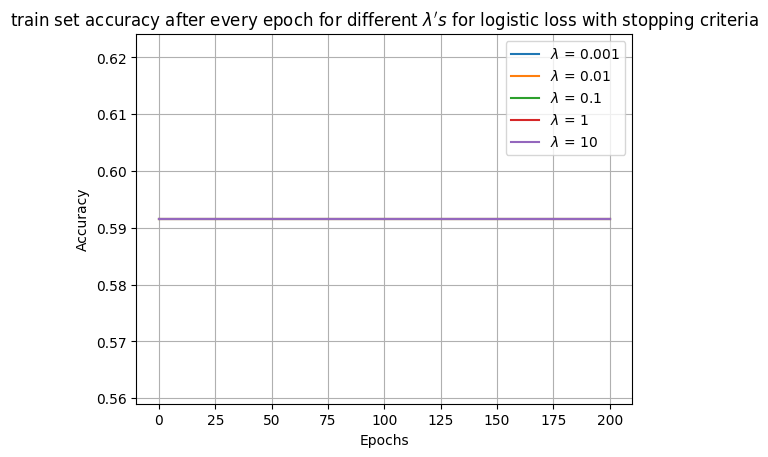

In [144]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(train_set_accuracy_store[i]))]
  plt.plot(epochs, train_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for different $\lambda's$ for logistic loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

Train accuracy is  constant for all $\lambda 's$

In [147]:
list_of_final_train_set_accuracy = [x[-1] for x in train_set_accuracy_store]
list_of_final_test_set_accuracy = [x[-1] for x in test_set_accuracy_store]

In [148]:
from tabulate import tabulate
head = [f"lambda", "Train set accuracy","Test set accuracy"]
table=[[lamdas[i], list_of_final_train_set_accuracy[i], list_of_final_test_set_accuracy[i]] for i in range(len(lamdas)) ]
print(tabulate(table, headers=head, tablefmt="grid"))

+----------+----------------------+---------------------+
|   lambda |   Train set accuracy |   Test set accuracy |
+==========+======================+=====================+
|    0.001 |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.01  |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.1   |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    1     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|   10     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+


Observations:

As we observe that for $\lambda = 0.01$ once again the algorithm moves towards better objective value. With stopping criteria in place the algorithm converges for some lambda values while some do not.

$\lambda = 0.01$ performs better compared to other $\lambda 's$ when only the objective value is concerned. It also depends on the initialization of weights.

The logistic loss function is well-suited for probabilistic classification tasks, as it provides probabilistic interpretations of the model predictions.
OPT1 with stopping criteria may lead to better performance in terms of accuracy when optimizing the logistic loss function. The smoother optimization behavior of the logistic loss function makes it more robust to hyperparameter choices such as the learning rate and regularization strength.
OPT1 with stopping criteria is robust to hyperparameter choices due to its adaptability to different convergence behaviors. This adaptability allows it to effectively optimize the logistic loss function across a wide range of hyperparameters.

SQUARED HINGE

In [149]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]    #[1e-3, 1e-2, 0.1, 1, 10]
objective_values_lamda_store = []
test_set_accuracy_store = []
train_set_accuracy_store = []
final_test_set_accuracy_store = []
epochs = [i for i in range(500)]
for lamda in lamdas:
  best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy = OPT1_with_stopping_criterion_with_sqhinge(train_data, train_label, lamda, 500)
  # plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')
  objective_values_lamda_store.append(objective_values)
  test_set_accuracy_store.append(test_set_accuracy)
  train_set_accuracy_store.append(train_set_accuracy)
# plt.legend()
# plt.show()

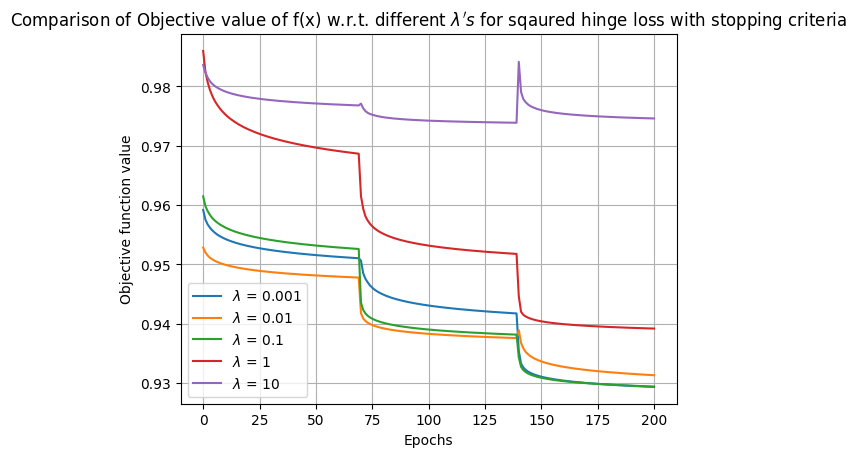

In [150]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(objective_values_lamda_store[i]))]
  plt.plot(epochs, objective_values_lamda_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for sqaured hinge loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

As we observe, for lambda = 0.1 achieves lowest objective value and converges much faster than other counterpart. But all of the algorithms are stopping at tolerance itself, showing that accuracy isn't improving

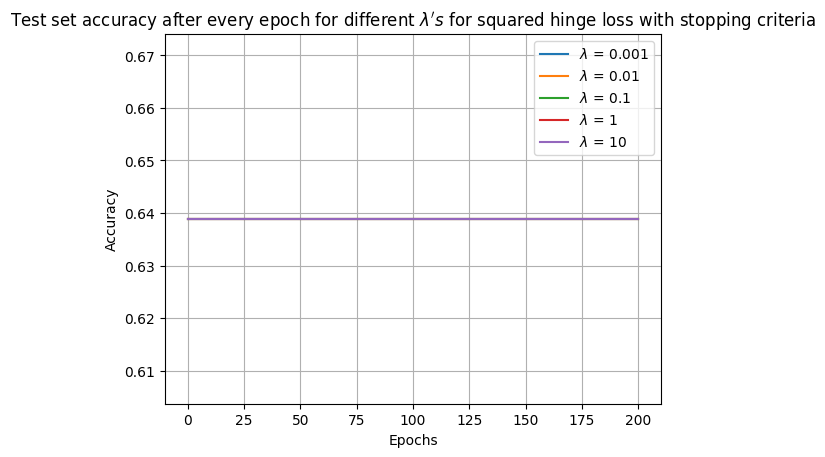

In [152]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
i=0
for lamda in lamdas:
  epochs = [i for i in range(len(test_set_accuracy_store[i]))]
  plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for different $\lambda's$ for squared hinge loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

Test set accuracy same for all the lambdas

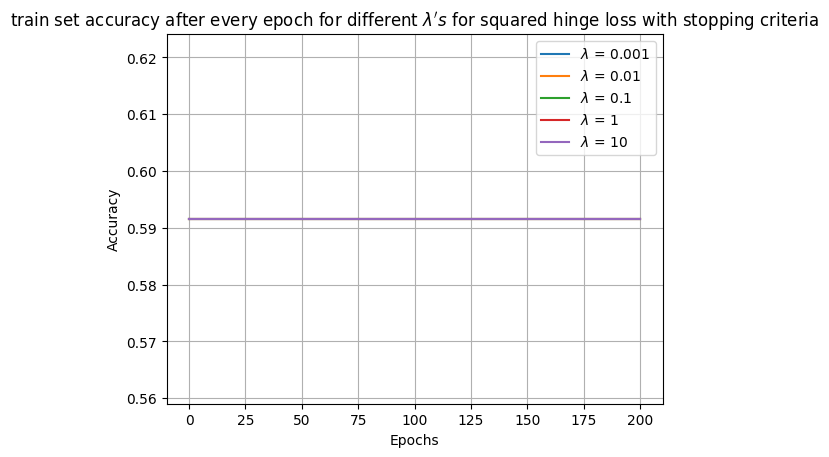

In [153]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(train_set_accuracy_store[i]))]
  plt.plot(epochs, train_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for different $\lambda's$ for squared hinge loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

Training accuracy is same as well

In [154]:
list_of_final_train_set_accuracy = [x[-1] for x in train_set_accuracy_store]
list_of_final_test_set_accuracy = [x[-1] for x in test_set_accuracy_store]

In [155]:
from tabulate import tabulate
head = [f"lambda", "Train set accuracy","Test set accuracy"]
table=[[lamdas[i], list_of_final_train_set_accuracy[i], list_of_final_test_set_accuracy[i]] for i in range(len(lamdas)) ]
print(tabulate(table, headers=head, tablefmt="grid"))

+----------+----------------------+---------------------+
|   lambda |   Train set accuracy |   Test set accuracy |
+==========+======================+=====================+
|    0.001 |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.01  |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.1   |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    1     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|   10     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+


Observations:

As we observe that for $\lambda = 0.1$ the algorithm moves towards better objective value. It also depends on the initialization of weights.

The squared hinge loss function is convex and piecewise quadratic, which means it generally converges efficiently. Both OPT1 and OPT1 with stopping criteria may converge relatively quickly when optimizing the squared hinge loss function. However, OPT1 with stopping criteria may show slightly faster convergence due to its adaptive termination mechanism.

The squared hinge loss function has a smoother derivative compared to the hinge loss function, which can lead to more stable optimization behavior.

The squared hinge loss function penalizes misclassifications quadratically, which can lead to more robust optimization behavior compared to the hinge loss function.

OPT1 with stopping criteria may lead to better performance in terms of accuracy when optimizing the squared hinge loss function. But here because of that the model is underfit









